In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Laboratorio 04: Raíces

---
### Profesor: Juan Marcos Marín
### Nombre: Juan Jose Usuga Giraldo 1020482080
*Métodos computacionales 2024-II*

---

#1
¿Para que ángulo el area del segmento circular es igual a un cuarto del area de una circunferencia?

- Muestre que la expresión que permite resolver este problema será:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- Construya una grafica para $\theta$  ¿Alrededor de que punto esta solución?(Para este punto se recomienda emplear `dataframe`).

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.

1. Área de la circunferencia:
A_c = π * r^2

2. Un cuarto del área de la circunferencia:
A_c = (π * r^2) / 4

3. Área del segmento circular:
A_seg = (1 / 2) * r^2 * (θ - sin(θ))

4. Igualar las áreas:
(1 / 2) * r^2 * (θ - sin(θ)) = (π * r^2) / 4

5. Simplificar la ecuación:
θ - sin(θ) = π / 2


In [ ]:
from scipy.optimize import bisect, fixed_point, newton, newton_krylov
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import bisect

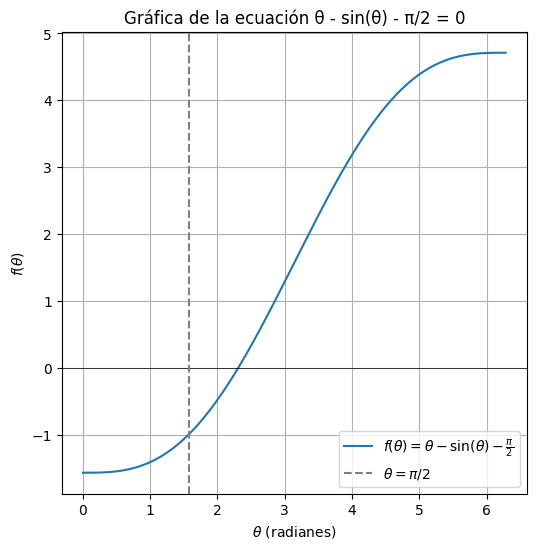

Solución por Bisección: 2.3098814600091373
Solución por Punto Fijo: 2.3098814600100575
Solución por Newton: 2.3098814600100575
Solución por Secante: 2.3098814600100575


In [ ]:
def f(theta):
    return theta - np.sin(theta) - np.pi / 2

#g(θ) para el método de punto fijo
def g(theta):
    return np.sin(theta) + np.pi / 2

# 1. Graficar la función f(θ)
theta_values = np.linspace(0, 2 * np.pi, 1000)
f_values = f(theta_values)

plt.figure(figsize=(6,6))
plt.plot(theta_values, f_values, label=r'$f(\theta) = \theta - \sin(\theta) - \frac{\pi}{2}$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(np.pi/2, color='gray', linestyle='--', label=r'$\theta = \pi/2$')
plt.title('Gráfica de la ecuación θ - sin(θ) - π/2 = 0')
plt.xlabel(r'$\theta$ (radianes)')
plt.ylabel(r'$f(\theta)$')
plt.grid(True)
plt.legend()
plt.show()

# Método de Bisección
bisec_sol = bisect(f, 0.5, 3)

# Método de Punto Fijo
punto_fijo_sol = fixed_point(g, 1.5)

# Método de Newton
newton_sol = newton(f, 1.5)

# Secante (con scipy.optimize es el mismo que Newton sin derivada)
secante_sol = newton(f, 1.5, fprime=None)

print(f"Solución por Bisección: {bisec_sol}")
print(f"Solución por Punto Fijo: {punto_fijo_sol}")
print(f"Solución por Newton: {newton_sol}")
print(f"Solución por Secante: {secante_sol}")


# 2

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$


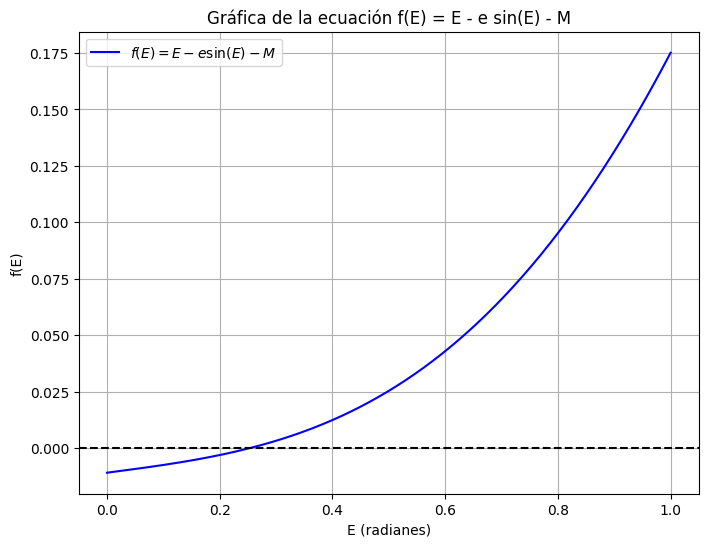

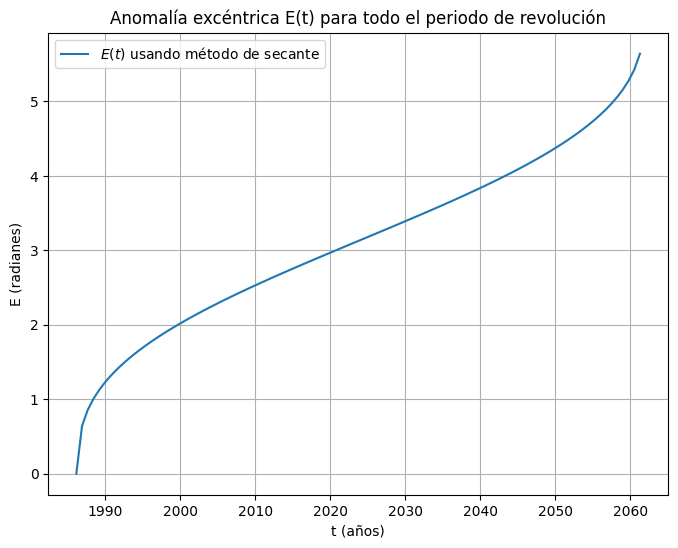

Solución de E para el 1 de abril de 1986 usando Newton: 0.25402698832682075


In [ ]:
# Aqui va su código
# Parámetros del problema
e = 0.9672671  # Excentricidad
T = 75.96000   # Periodo orbital (en años)
t0 = 1986.1113  # Tiempo en el perihelio (en años)
t_abril_1 = 1986 + (30 * 2 + 28 + 1) / 365.25  # Tiempo el 1 de abril de 1986
delta_t = T / 100  # Paso de tiempo

# Calcular M(t) para el 1 de abril de 1986
def M(t):
    return 2 * np.pi / T * (t - t0)

M_abril_1 = M(t_abril_1)

# Función f(E) = E - e*sin(E) - M(t)
def f(E, M_value):
    return E - e * np.sin(E) - M_value

# Graficar f(E) = E - e*sin(E) - M para E ∈ [0, 1]
E_values = np.linspace(0, 1, 500)
f_values = f(E_values, M_abril_1)

plt.figure(figsize=(8, 6))
plt.plot(E_values, f_values, label=r'$f(E) = E - e \sin(E) - M$', color='blue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Gráfica de la ecuación f(E) = E - e sin(E) - M')
plt.xlabel('E (radianes)')
plt.ylabel('f(E)')
plt.grid(True)
plt.legend()
plt.show()

# 1. Resolver usando el método de Newton para el 1 de abril de 1986
E_newton_abril_1 = newton(f, 0.5, args=(M_abril_1,))

# 2. Resolver usando el método de Secante para todo el periodo (100 puntos)
E_secante_values = []
time_values = []
for i in range(100):
    ti = t0 + i * delta_t
    Mi = M(ti)
    Ei = newton(f, 0.5, args=(Mi,))  # Usamos Newton como una forma de secante sin derivada
    E_secante_values.append(Ei)
    time_values.append(ti)

# Graficar E = E(t) para todo el periodo
plt.figure(figsize=(8, 6))
plt.plot(time_values, E_secante_values, label=r'$E(t)$ usando método de secante')
plt.title('Anomalía excéntrica E(t) para todo el periodo de revolución')
plt.xlabel('t (años)')
plt.ylabel('E (radianes)')
plt.grid(True)
plt.legend()
plt.show()

# Mostrar el resultado para el 1 de abril de 1986
print(f"Solución de E para el 1 de abril de 1986 usando Newton: {E_newton_abril_1}")


In [ ]:
t_abril_1

1986.2436687200548

#3
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

* La magnetización reducida empleando el metodo de la secante y Newton-Raphson(Muestre su resultado con 4 cifras)

* Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

Magnetización usando Newton-Raphson (T=0.5): 0.9575
Magnetización usando el método de la Secante (T=0.5): 0.9575
Magnetización usando el método de punto fijo (T=0.5): 0.9575


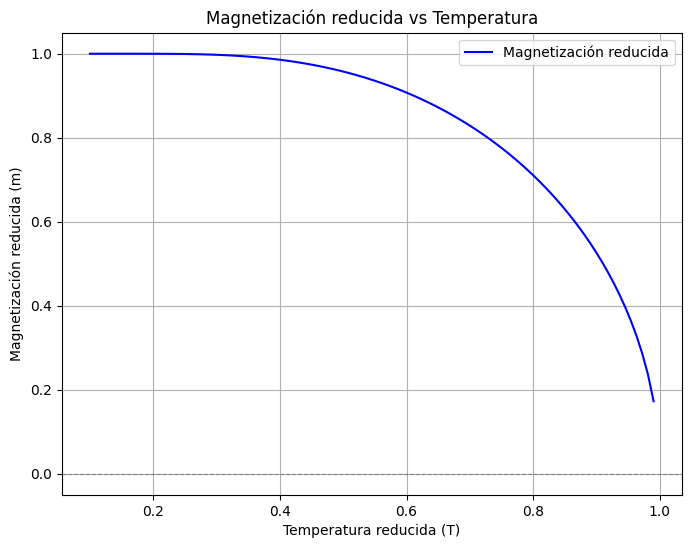

In [ ]:
import numpy as np
from scipy.optimize import newton, fixed_point
import matplotlib.pyplot as plt

# Definir la función para resolver m(T) = tanh(m(T) / T)
def f(m, T):
    return np.tanh(m / T) - m

# Definir g(m) para el método de punto fijo
def g(m, T):
    return np.tanh(m / T)

# **Cálculo de la magnetización para T=0.5**
T_fixed = 0.5

# 1. Método de Newton-Raphson
m_newton = newton(f, 0.5, args=(T_fixed,))  # Estimación inicial m = 0.5
print(f"Magnetización usando Newton-Raphson (T=0.5): {m_newton:.4f}")

# 2. Método de la Secante
# `newton` sin derivada usa el método de la secante
m_secante = newton(f, 0.5, args=(T_fixed,))
print(f"Magnetización usando el método de la Secante (T=0.5): {m_secante:.4f}")

# 3. Método de Punto Fijo
m_punto_fijo = fixed_point(g, 0.5, args=(T_fixed,))
print(f"Magnetización usando el método de punto fijo (T=0.5): {m_punto_fijo:.4f}")

# **Graficar magnetización reducida vs temperatura**
T_values = np.linspace(0.1, 0.99, 100)
m_values = []

# Resolver para cada T
for T in T_values:
    try:
        m_T = newton(f, 0.5, args=(T,))  # Estimación inicial m = 0.5
        m_values.append(m_T)
    except RuntimeError:
        m_values.append(np.nan)  # En caso de fallo, agregar un NaN

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(T_values, m_values, label="Magnetización reducida", color="blue")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.title("Magnetización reducida vs Temperatura")
plt.xlabel("Temperatura reducida (T)")
plt.ylabel("Magnetización reducida (m)")
plt.legend()
plt.grid()
plt.show()
